In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID',axis=1,inplace=True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x : '20' if x == ' ' else x)

In [8]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [11]:
import seaborn as sns

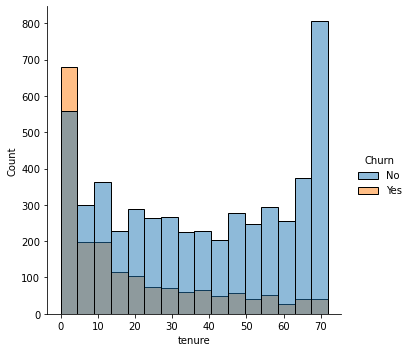

In [12]:
sns.displot(x =df['tenure'],data =df,hue=df['Churn'],color=['green','red'])

In [13]:
tenure_yes = df[df['Churn']=='Yes']['tenure']
tenure_no = df[df['Churn']=='No']['tenure']

In [14]:
import matplotlib.pyplot as plt

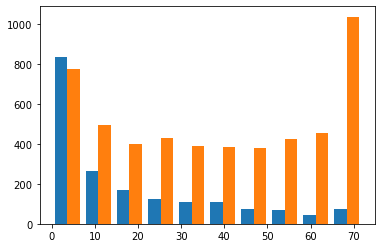

In [15]:
plt.hist([tenure_yes,tenure_no])
plt.show()

<AxesSubplot:xlabel='tenure', ylabel='Count'>

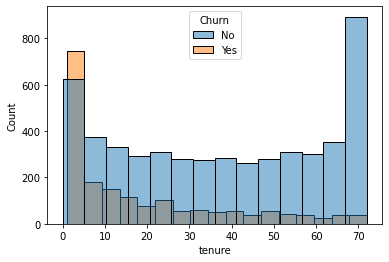

In [16]:
sns.histplot(x = df['tenure'],data = df,hue=df['Churn'],common_bins=False)

In [17]:
k = df.select_dtypes(include='object').columns

In [18]:
for i in k:
    v=df[i].value_counts()
    print(v)
    print('*'*50)
    

Male      3555
Female    3488
Name: gender, dtype: int64
**************************************************
No     3641
Yes    3402
Name: Partner, dtype: int64
**************************************************
No     4933
Yes    2110
Name: Dependents, dtype: int64
**************************************************
Yes    6361
No      682
Name: PhoneService, dtype: int64
**************************************************
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
**************************************************
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
**************************************************
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
**************************************************
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBa

In [19]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
df.replace('No internet service','No',inplace=True)

In [21]:
df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [22]:
df.replace('No phone service','No',inplace=True)

In [23]:
for i in k:
    v=df[i].value_counts()
    print(v)
    print('*'*50)

Male      3555
Female    3488
Name: gender, dtype: int64
**************************************************
No     3641
Yes    3402
Name: Partner, dtype: int64
**************************************************
No     4933
Yes    2110
Name: Dependents, dtype: int64
**************************************************
Yes    6361
No      682
Name: PhoneService, dtype: int64
**************************************************
No     4072
Yes    2971
Name: MultipleLines, dtype: int64
**************************************************
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
**************************************************
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64
**************************************************
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64
**************************************************
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64
****************************************

In [24]:
Yes_No_Columns =['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [25]:
for col in Yes_No_Columns:
    df[col].replace({'Yes':1,'No':0},inplace=True) 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [27]:
df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
8,Female,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,Male,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [28]:
df['gender']=df['gender'].replace({'Male':1,'Female':0})

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
ohe = OneHotEncoder()

In [32]:
df_final = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])

In [35]:
pd.set_option('display.max_columns',100)

In [36]:
df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [39]:
mmc = MinMaxScaler()

In [40]:
df_final[col_to_scale]= mmc.fit_transform(df_final[col_to_scale])

In [41]:
df_final

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.027778,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.027778,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,1,0,1,1,1,1,1,0.662189,0.227521,0,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.152778,0,0,1,0,0,0,0,0,1,0.112935,0.037809,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.055556,1,1,0,0,0,0,0,0,1,0.558706,0.033210,1,0,1,0,1,0,0,0,0,0,1


In [42]:
X = df_final.drop('Churn',axis=1)
y = df_final['Churn']

In [43]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,0,1,0,0,0,0,1,0.115423,0.001275,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,1,0,1,0,0,0,0,0.385075,0.215867,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.027778,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,1,0,1,1,0,0,0,0.239303,0.210241,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.027778,1,0,0,0,0,0,0,0,1,0.521891,0.015330,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,1,0,1,1,1,1,1,0.662189,0.227521,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.152778,0,0,1,0,0,0,0,0,1,0.112935,0.037809,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.055556,1,1,0,0,0,0,0,0,1,0.558706,0.033210,0,1,0,1,0,0,0,0,0,1


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [46]:
x_train.shape

(5634, 26)

In [47]:
x_test.shape

(1409, 26)

In [48]:
import tensorflow as tf
from tensorflow import keras

In [51]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape =(26,),activation = 'relu'),
    keras.layers.Dense(15,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid'), 
])

model.compile(loss='BinaryCrossentropy',optimizer = 'adam',metrics=['accuracy'])

In [53]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8069
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8049
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8072
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8092
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8092
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8106
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8120
Epoch 8/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8088
Epoch 9/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8113
Epoch 10/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4053 - accura

In [54]:
model.evaluate(x_test,y_test)

45/45 [==============================] - 0s 1ms/step - loss: 0.4629 - accuracy: 0.7835


[0.46289581060409546, 0.7835344076156616]

In [55]:
y_pred = model.predict(x_test)

45/45 [==============================] - 0s 1ms/step


In [56]:
y_pred

array([[0.28605244],
       [0.5808601 ],
       [0.3466943 ],
       ...,
       [0.09183685],
       [0.02180374],
       [0.12674114]], dtype=float32)

In [57]:
#as it is sigmoid function the out put will be any value between 0 to 1. 
#So to aliggn with out output value we need to convert it in to 0,1

In [58]:
y_pred_final=[]
for i in y_pred:
    if i >0.5:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)

In [59]:
y_pred_final

[0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [61]:
from sklearn.metrics import classification_report,confusion_matrix



In [63]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1023
           1       0.64      0.47      0.54       386

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [64]:
cm =confusion_matrix(y_test,y_pred_final)

In [65]:
cm

array([[923, 100],
       [205, 181]], dtype=int64)

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

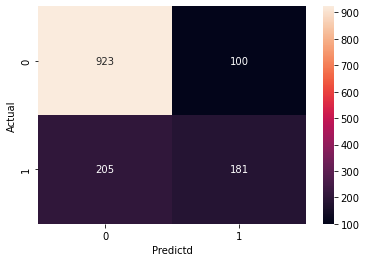

In [71]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predictd')
plt.ylabel('Actual')
plt.show()